In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn
import datetime
import scipy
from pylab import rcParams
rcParams['figure.figsize']=15,6
RANDOM_SEED =151
LABELS=['Normal','Fraud']

In [2]:
data=pd.read_csv('../input/creditcardfraud/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape

(284807, 31)

In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
### Encoding part
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
### feature scaling not required as we cannot consider time and amount

data.describe().round(2).style.background_gradient()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.860000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,88.350000,0.000000
std,47488.150000,1.960000,1.650000,1.520000,1.420000,1.380000,1.330000,1.240000,1.190000,1.100000,1.090000,1.020000,1.000000,1.000000,0.960000,0.920000,0.880000,0.850000,0.840000,0.810000,0.770000,0.730000,0.730000,0.620000,0.610000,0.520000,0.480000,0.400000,0.330000,250.120000,0.040000
min,0.000000,-56.410000,-72.720000,-48.330000,-5.680000,-113.740000,-26.160000,-43.560000,-73.220000,-13.430000,-24.590000,-4.800000,-18.680000,-5.790000,-19.210000,-4.500000,-14.130000,-25.160000,-9.500000,-7.210000,-54.500000,-34.830000,-10.930000,-44.810000,-2.840000,-10.300000,-2.600000,-22.570000,-15.430000,0.000000,0.000000
25%,54201.500000,-0.920000,-0.600000,-0.890000,-0.850000,-0.690000,-0.770000,-0.550000,-0.210000,-0.640000,-0.540000,-0.760000,-0.410000,-0.650000,-0.430000,-0.580000,-0.470000,-0.480000,-0.500000,-0.460000,-0.210000,-0.230000,-0.540000,-0.160000,-0.350000,-0.320000,-0.330000,-0.070000,-0.050000,5.600000,0.000000
50%,84692.000000,0.020000,0.070000,0.180000,-0.020000,-0.050000,-0.270000,0.040000,0.020000,-0.050000,-0.090000,-0.030000,0.140000,-0.010000,0.050000,0.050000,0.070000,-0.070000,-0.000000,0.000000,-0.060000,-0.030000,0.010000,-0.010000,0.040000,0.020000,-0.050000,0.000000,0.010000,22.000000,0.000000
75%,139320.500000,1.320000,0.800000,1.030000,0.740000,0.610000,0.400000,0.570000,0.330000,0.600000,0.450000,0.740000,0.620000,0.660000,0.490000,0.650000,0.520000,0.400000,0.500000,0.460000,0.130000,0.190000,0.530000,0.150000,0.440000,0.350000,0.240000,0.090000,0.080000,77.160000,0.000000
max,172792.000000,2.450000,22.060000,9.380000,16.880000,34.800000,73.300000,120.590000,20.010000,15.590000,23.750000,12.020000,7.850000,7.130000,10.530000,8.880000,17.320000,9.250000,5.040000,5.590000,39.420000,27.200000,10.500000,22.530000,4.580000,7.520000,3.520000,31.610000,33.850000,25691.160000,1.000000


In [8]:
data.duplicated().sum()

1081

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
## PArt5 check imblance dataset
## It is imbalance dataset
### however its domain specific problem abd we cant not say that every two transisition is fraud
data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

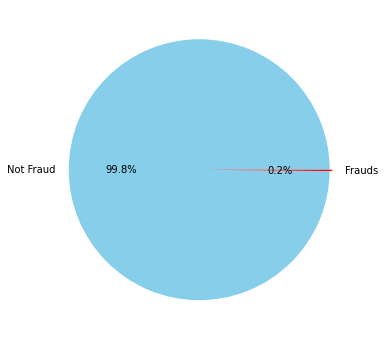

In [11]:
plt.figure(figsize=(10,6))
labels=['Not Fraud' , 'Frauds']
explode = [.01,.01]
color=['skyblue' , 'Red']
sizes=data.Class.value_counts().values

plt.pie(sizes,explode,labels,autopct="%1.1f%%", colors = color)
plt.show()

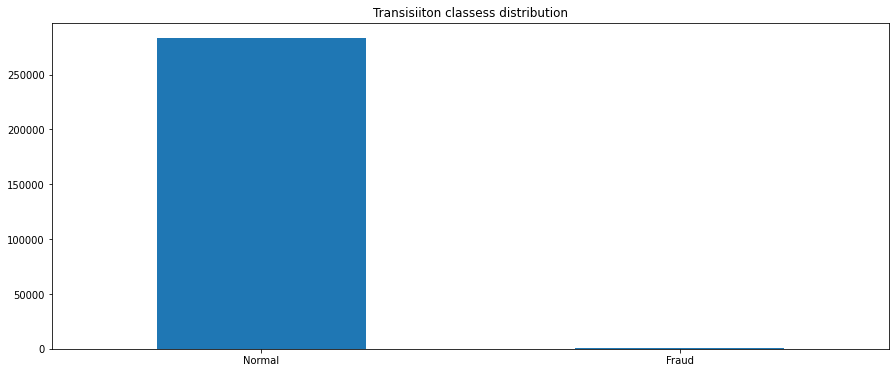

In [12]:
count_classes=pd.value_counts(data['Class'],sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title('Transisiiton classess distribution')
plt.xticks(range(2),LABELS)
plt.show()

In [13]:
fraud=data[data['Class']==1]
normal=data[data['Class']==0]
print(fraud.shape , normal.shape)

(473, 31) (283253, 31)


In [14]:
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
normal.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

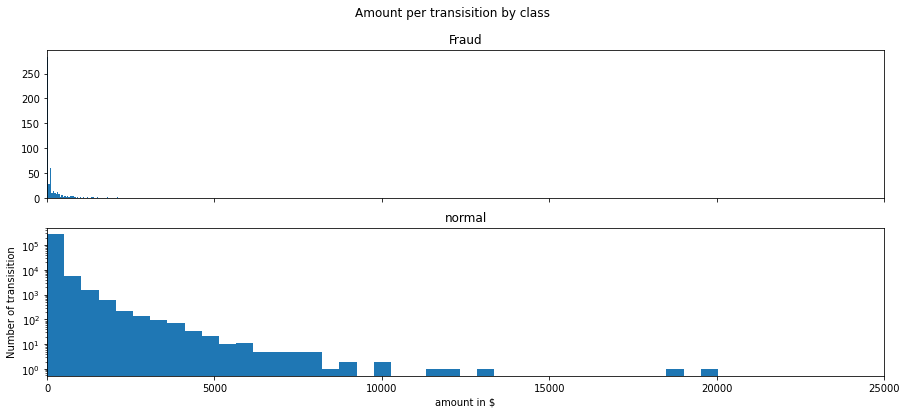

In [16]:
f,(ax1,ax2)=plt.subplots(2,1,sharex=True)
f.suptitle('Amount per transisition by class')
bins =50
ax1.hist(fraud.Amount , bins=bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount,bins=bins)
ax2.set_title('normal')

plt.xlabel('amount in $')
plt.ylabel('Number of transisition')

plt.xlim(0,25000)
plt.yscale('log')
plt.show()

Text(0.5, 1.0, 'normal')

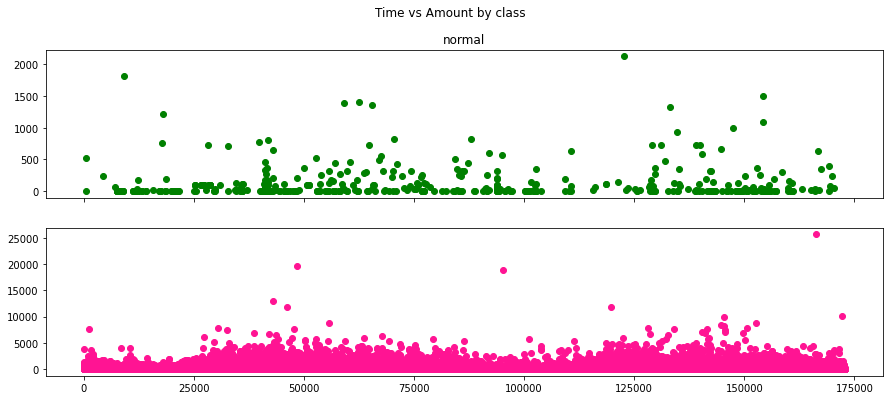

In [17]:
f , (ax1,ax2)=plt.subplots(2,1,sharex=True)
f.suptitle('Time vs Amount by class')

ax1.scatter(fraud.Time ,fraud.Amount,color = 'green')
ax1.set_title('Fraud')

ax2.scatter(normal.Time,normal.Amount,color = 'deeppink')
ax1.set_title('normal')

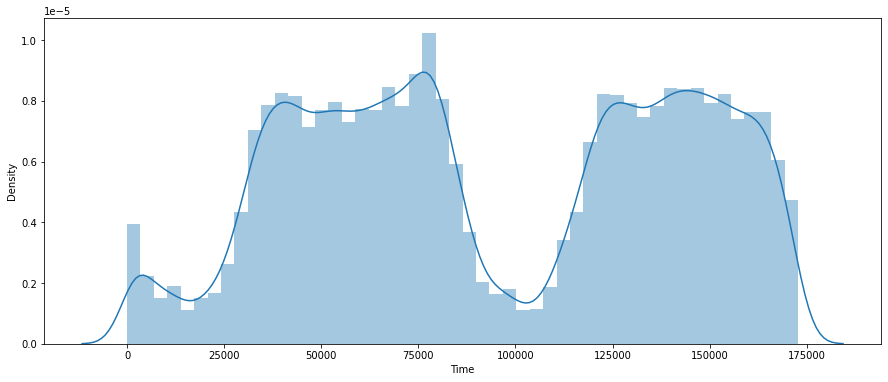

In [18]:
sns.distplot(data['Time'])
plt.show()

<AxesSubplot:>

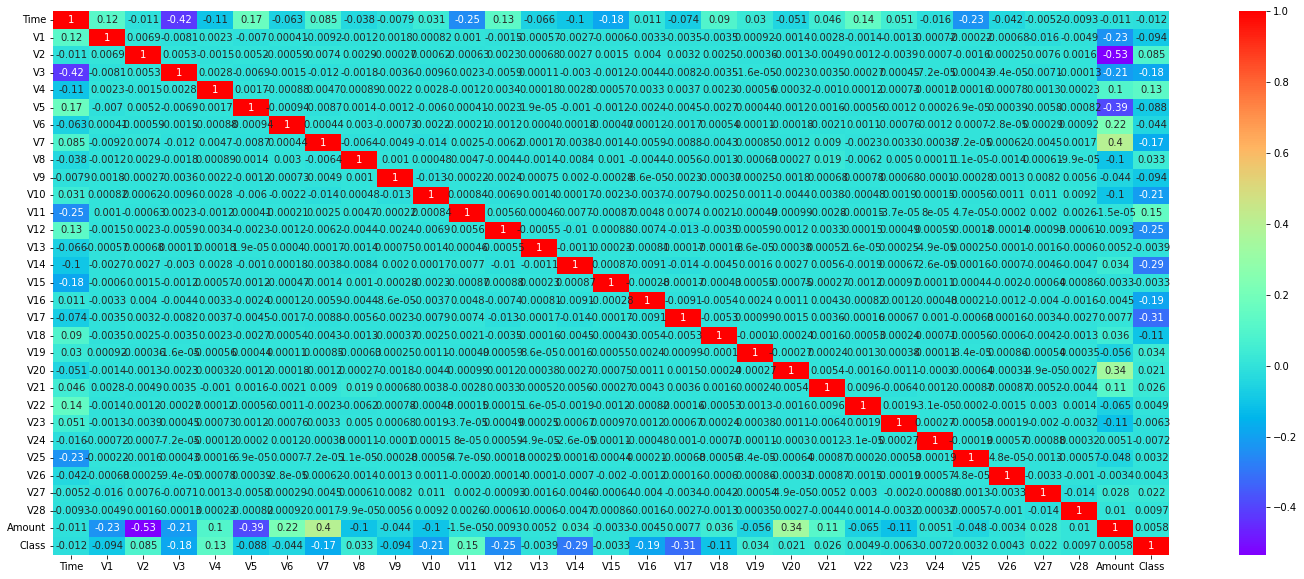

In [19]:
plt.figure(figsize=(25,10))
sns.heatmap(data.corr(),annot=True,cmap='rainbow')

In [20]:


x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [21]:
from sklearn.model_selection import train_test_split
x_train , x_test ,y_train ,y_test =train_test_split(x,y,train_size=0.75,random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(212794, 30)
(70932, 30)
(212794,)
(70932,)


In [22]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression()
logit.fit(x_train,y_train)

LogisticRegression()

In [23]:
## preict model with test datatest

y_pred_train =logit.predict(x_train)
y_pred_test=logit.predict(x_test)

In [24]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [25]:
print(confusion_matrix(y_train,y_pred_train))
print('********')
print(confusion_matrix(y_test,y_pred_test))

[[212332    105]
 [   117    240]]
********
[[70780    36]
 [   33    83]]


In [26]:
print(classification_report(y_train,y_pred_train))
print('********')
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    212437
           1       0.70      0.67      0.68       357

    accuracy                           1.00    212794
   macro avg       0.85      0.84      0.84    212794
weighted avg       1.00      1.00      1.00    212794

********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70816
           1       0.70      0.72      0.71       116

    accuracy                           1.00     70932
   macro avg       0.85      0.86      0.85     70932
weighted avg       1.00      1.00      1.00     70932



In [27]:
print(accuracy_score(y_train,y_pred_train))
print('********')
print(accuracy_score(y_test,y_pred_test))

0.9989567375019972
********
0.9990272373540856
